<a href="https://colab.research.google.com/github/PlayfulDevBit/PricePrediction/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the California Housing dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Correlation Matrix:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.0048

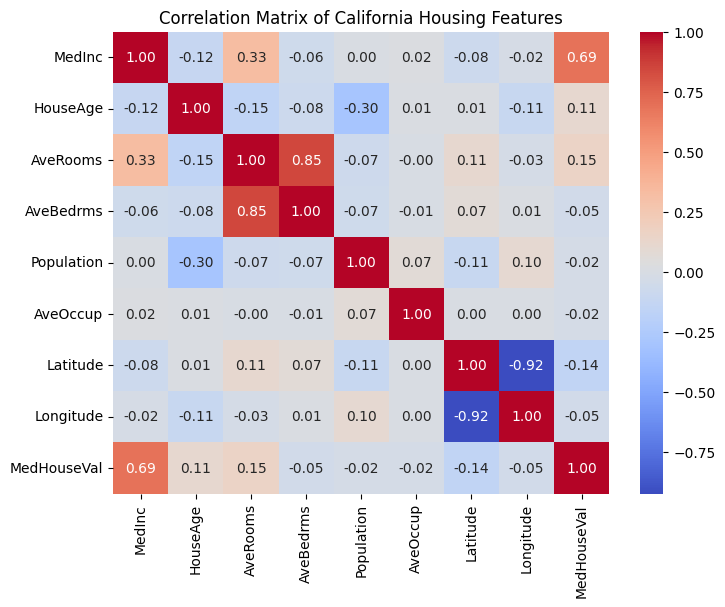


R^2 Score: 0.459


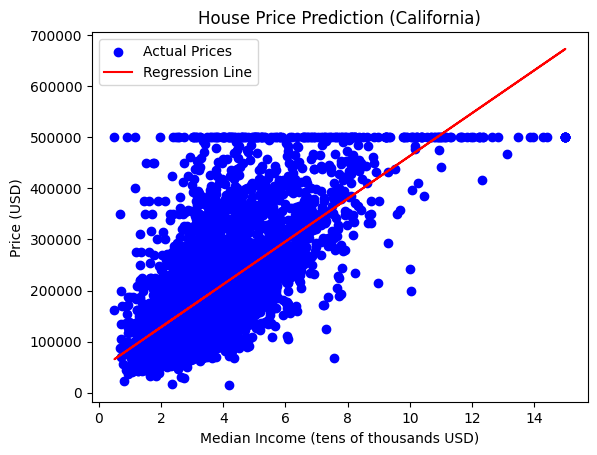

In [11]:
# price_prediction.ipynb

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load California Housing dataset
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
print("First 5 rows of the California Housing dataset:")
print(df.head())

# Display correlation matrix
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of California Housing Features')
plt.show()

# Prepare data for regression
X = df[['MedInc']].dropna()  # Feature: Median income (in tens of thousands of USD)
y = df['MedHouseVal'].dropna() * 100000  # Target: House price in USD

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(f"\nR^2 Score: {r2_score(y_test, y_pred):.3f}")

# Visualize regression results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Median Income (tens of thousands USD)')
plt.ylabel('Price (USD)')
plt.title('House Price Prediction (California)')
plt.legend()
plt.show()